# Задача 1: Сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

* кошки (животные) 
* UNIX-утилита cat для вывода содержимого файлов   
* версии операционной системы OS X, названные в честь семейства кошачьих  

*Задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.*



Выполните следующие шаги:

1. Скачаем файл.  
2. Каждая строка в файле соответствует одному предложению. Считаем их и приведём каждую к нижнему регистру.   
3. Произведём токенизацию, то есть разбиение текстов на слова. Удалим пустые слова после разделения.  
4. Сопоставим список всех слов, встречающихся в предложениях.     
5. Создадим матрицу размера n * d, где n — число предложений. Заполним ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У нас должна получиться матрица размера 22 * 254.  
6. Найдите косинусное расстояние от предложения в самой первой строке до всех остальных. Найдём две строки, ближайших к этому расстоянию?  

  

### Скачаем файл с предложениями.

In [1]:
sentences = open(r'sentences.txt', 'r+').readlines()

### Каждая строка в файле соответствует одному предложению. Считаем их и приведём каждую к нижнему регистру.

In [2]:
sentences = [x.lower() for x in sentences]
sentences = [x.split('\n')[0] for x in sentences]

In [3]:
sentences

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

### Произведём токенизацию.

In [4]:
import re

In [5]:
sentences = [re.split('[^a-z]',sentences[x]) for x in range(len(sentences))]

In [6]:
for i in range(len(sentences)):
    while '' in sentences[i]:
        sentences[i].remove('') 

In [7]:
sentences

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

### Составьте список всех слов, встречающихся в предложениях.

In [8]:
words = []
for row in range(len(sentences)):
    for word in sentences[row]:
        if word not in words:
            words.append(word)

In [9]:
words

['in',
 'comparison',
 'to',
 'dogs',
 'cats',
 'have',
 'not',
 'undergone',
 'major',
 'changes',
 'during',
 'the',
 'domestication',
 'process',
 'as',
 'cat',
 'simply',
 'catenates',
 'streams',
 'of',
 'bytes',
 'it',
 'can',
 'be',
 'also',
 'used',
 'concatenate',
 'binary',
 'files',
 'where',
 'will',
 'just',
 'sequence',
 'a',
 'common',
 'interactive',
 'use',
 'for',
 'single',
 'file',
 'is',
 'output',
 'content',
 'standard',
 'hear',
 'sounds',
 'too',
 'faint',
 'or',
 'high',
 'frequency',
 'human',
 'ears',
 'such',
 'those',
 'made',
 'by',
 'mice',
 'and',
 'other',
 'small',
 'animals',
 'one',
 'people',
 'deliberately',
 'tamed',
 'artificial',
 'selection',
 'they',
 'were',
 'useful',
 'predators',
 'vermin',
 'domesticated',
 'its',
 'closest',
 'wild',
 'ancestor',
 'are',
 'both',
 'diploid',
 'organisms',
 'that',
 'possess',
 'chromosomes',
 'roughly',
 'genes',
 'domestic',
 'similar',
 'size',
 'members',
 'genus',
 'felis',
 'typically',
 'weighing'

In [10]:
dct = {}
for i in range(len(words)):
    dct[i] = words[i]

In [11]:
dct

{0: 'in',
 1: 'comparison',
 2: 'to',
 3: 'dogs',
 4: 'cats',
 5: 'have',
 6: 'not',
 7: 'undergone',
 8: 'major',
 9: 'changes',
 10: 'during',
 11: 'the',
 12: 'domestication',
 13: 'process',
 14: 'as',
 15: 'cat',
 16: 'simply',
 17: 'catenates',
 18: 'streams',
 19: 'of',
 20: 'bytes',
 21: 'it',
 22: 'can',
 23: 'be',
 24: 'also',
 25: 'used',
 26: 'concatenate',
 27: 'binary',
 28: 'files',
 29: 'where',
 30: 'will',
 31: 'just',
 32: 'sequence',
 33: 'a',
 34: 'common',
 35: 'interactive',
 36: 'use',
 37: 'for',
 38: 'single',
 39: 'file',
 40: 'is',
 41: 'output',
 42: 'content',
 43: 'standard',
 44: 'hear',
 45: 'sounds',
 46: 'too',
 47: 'faint',
 48: 'or',
 49: 'high',
 50: 'frequency',
 51: 'human',
 52: 'ears',
 53: 'such',
 54: 'those',
 55: 'made',
 56: 'by',
 57: 'mice',
 58: 'and',
 59: 'other',
 60: 'small',
 61: 'animals',
 62: 'one',
 63: 'people',
 64: 'deliberately',
 65: 'tamed',
 66: 'artificial',
 67: 'selection',
 68: 'they',
 69: 'were',
 70: 'useful',
 71

### Создадим матрицу.

In [5]:
import numpy as np

In [13]:
matrix = np.zeros((22,254))

In [14]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
for i in range(len(sentences)):
    for j in dct.keys(): 
        if dct[j] in sentences[i]:
            matrix[i, j] += 1 

In [16]:
dct

{0: 'in',
 1: 'comparison',
 2: 'to',
 3: 'dogs',
 4: 'cats',
 5: 'have',
 6: 'not',
 7: 'undergone',
 8: 'major',
 9: 'changes',
 10: 'during',
 11: 'the',
 12: 'domestication',
 13: 'process',
 14: 'as',
 15: 'cat',
 16: 'simply',
 17: 'catenates',
 18: 'streams',
 19: 'of',
 20: 'bytes',
 21: 'it',
 22: 'can',
 23: 'be',
 24: 'also',
 25: 'used',
 26: 'concatenate',
 27: 'binary',
 28: 'files',
 29: 'where',
 30: 'will',
 31: 'just',
 32: 'sequence',
 33: 'a',
 34: 'common',
 35: 'interactive',
 36: 'use',
 37: 'for',
 38: 'single',
 39: 'file',
 40: 'is',
 41: 'output',
 42: 'content',
 43: 'standard',
 44: 'hear',
 45: 'sounds',
 46: 'too',
 47: 'faint',
 48: 'or',
 49: 'high',
 50: 'frequency',
 51: 'human',
 52: 'ears',
 53: 'such',
 54: 'those',
 55: 'made',
 56: 'by',
 57: 'mice',
 58: 'and',
 59: 'other',
 60: 'small',
 61: 'animals',
 62: 'one',
 63: 'people',
 64: 'deliberately',
 65: 'tamed',
 66: 'artificial',
 67: 'selection',
 68: 'they',
 69: 'were',
 70: 'useful',
 71

In [17]:
matrix[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Найдите косинусное расстояние от предложения в самой первой строке  до всех остальных.

In [18]:
from scipy.spatial.distance import cosine

In [19]:
cosines = {}
for i in range(1, len(matrix)):
    cos = cosine(matrix[0], matrix[i])
    print(f'Косинусное расстояние между первой строкой и строкой {i}: {cosine(matrix[0], matrix[i])}')
    cosines[i] = cos

Косинусное расстояние между первой строкой и строкой 1: 0.9402385695332803
Косинусное расстояние между первой строкой и строкой 2: 0.8619868881315291
Косинусное расстояние между первой строкой и строкой 3: 0.8885443574849294
Косинусное расстояние между первой строкой и строкой 4: 0.8055388829343507
Косинусное расстояние между первой строкой и строкой 5: 0.9351796276447836
Косинусное расстояние между первой строкой и строкой 6: 0.7547442642060137
Косинусное расстояние между первой строкой и строкой 7: 0.9154845745271484
Косинусное расстояние между первой строкой и строкой 8: 0.9069515789601529
Косинусное расстояние между первой строкой и строкой 9: 0.8833576312960392
Косинусное расстояние между первой строкой и строкой 10: 0.8703592552895671
Косинусное расстояние между первой строкой и строкой 11: 0.8703592552895671
Косинусное расстояние между первой строкой и строкой 12: 0.8773721321030068
Косинусное расстояние между первой строкой и строкой 13: 0.8703592552895671
Косинусное расстояние

#### Минимумы

In [20]:
sorted(cosines.values())[0:2]

[0.7547442642060137, 0.8055388829343507]

In [21]:
for key in cosines.keys():
    if (cosines[key] == 0.7547442642060137) or (cosines[key] == 0.8055388829343507):
        print(key)

4
6


In [22]:
print(open(r'sentences.txt', 'r+').readlines()[0])
print(open(r'sentences.txt', 'r+').readlines()[4])
print(open(r'sentences.txt', 'r+').readlines()[6])

In comparison to dogs, cats have not undergone major changes during the domestication process.

In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.

Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).



In [35]:
ans = [str(4), str(6)]

In [36]:
with open('answer_1', 'w') as output_file:
    output_file.write(' '.join(ans))

# Задача №2

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)



In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import sin, exp

In [59]:
sns.set(
    font_scale=1,
    style='whitegrid',
    rc={'figure.figsize':(10,8)}
)

In [82]:
f = lambda x: sin(x/5) * exp(x/10) + 5 * exp(-x/2)

In [83]:
a = np.linspace(1, 15, 30)

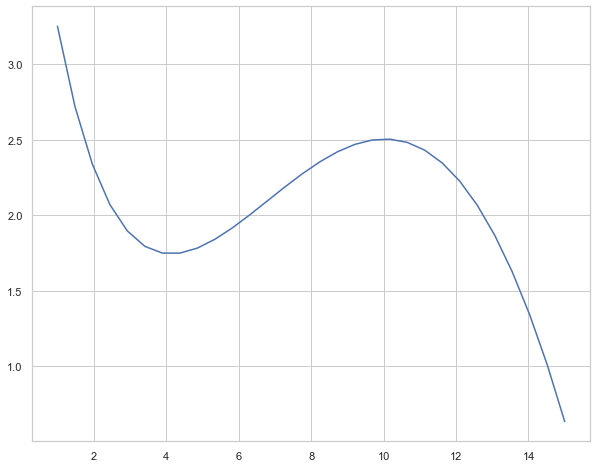

In [84]:
plt.plot(a, f(a));

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

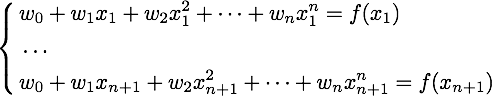

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

### 1. Сформируем систему линейных уравнений для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15.  


[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


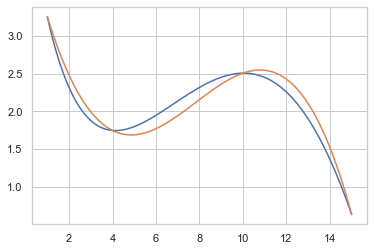

In [95]:
%matplotlib inline


import numpy as np;
import math;
import matplotlib.pyplot as plt;



def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)



# approximate at the given points (feel free to experiment: change/add/remove)
points = np.array([1, 4, 10, 15])
n = points.size



# fill A-matrix, each row is 1 or xi^0, xi^1, xi^2, xi^3 .. xi^n
A = np.zeros((n, n))
for index in range(0, n):
    A[index] = np.power(np.full(n, points[index]), np.arange(0, n, 1))



# fill b-matrix, i.e. function value at the given points
b = f(points)



# solve to get approximation polynomial coefficents
solve = np.linalg.solve(A,b)



# define the polynome approximation of the function
def polinom(x): 
    # Yi = solve * Xi where Xi = x^i
    tiles = np.tile(x, (n, 1))
    tiles[0] = np.ones(x.size)
    for index in range(1, n):
        tiles[index] = tiles[index]**index
    return solve.dot(tiles)



# plot the graphs of original function and its approximation
x = np.linspace(1, 15, 100)
plt.plot(x, f(x))
plt.plot(x, polinom(x))



# print out the coefficients of polynome approximating our function
print(solve)

In [96]:
A, b

(array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
        [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
        [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
        [1.000e+00, 1.500e+01, 2.250e+02, 3.375e+03]]),
 array([3.25221687, 1.74684595, 2.50541641, 0.63522142]))